<a href="https://colab.research.google.com/github/JHermosillaD/Python/blob/master/Microalgae/analisis_algas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.linear_model import LinearRegression

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
frame_spots  = pd.read_csv("/content/drive/My Drive/Record - Microalgae/Data/Case 6 - 2750/Spots in tracks statistics.csv")
frame_tracks = pd.read_csv("/content/drive/My Drive/Record - Microalgae/Data/Case 6 - 2750/Track statistics.csv") 

In [0]:
frame_spots[(frame_spots["FRAME"] ==0 ) & (frame_spots["TRACK_ID"] ==2) ]

,Label,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,VISIBILITY,MANUAL_COLOR,MEAN_INTENSITY,MEDIAN_INTENSITY,MIN_INTENSITY,MAX_INTENSITY,TOTAL_INTENSITY,STANDARD_DEVIATION,ESTIMATED_DIAMETER,CONTRAST,SNR
2148,ID70,70,2,3.126,291.485,73.834,0,0,0,13.75,1,-10921639,206.872,255,0,255,135915,99.857,24.626,0.67,1.663


In [0]:
spot_A = frame_spots[frame_spots["TRACK_ID"] == 2 ] 
spot_B = frame_spots[frame_spots["TRACK_ID"] == 3 ] 
spot_C = frame_spots[frame_spots["TRACK_ID"] == 4 ] 
spot_D = frame_spots[frame_spots["TRACK_ID"] == 11] 

In [0]:
x_A = np.array(spot_A["POSITION_X"]).reshape(-1, 1)
y_A = np.array(spot_A["POSITION_Y"]).reshape(-1, 1)
x_B = np.array(spot_B["POSITION_X"]).reshape(-1, 1)
y_B = np.array(spot_B["POSITION_Y"]).reshape(-1, 1)
x_C = np.array(spot_C["POSITION_X"]).reshape(-1, 1)
y_C = np.array(spot_C["POSITION_Y"]).reshape(-1, 1)
x_D = np.array(spot_D["POSITION_X"]).reshape(-1, 1)
y_D = np.array(spot_D["POSITION_Y"]).reshape(-1, 1)

In [0]:
def MSD_def(x,y,z):

  N = len(x)
  MSD = np.zeros((N, 0))
  t = np.zeros((N, 0))
  accumulated = 0
  i = 0

  while i < N:
    difference = np.sqrt((x[i, 0] - x[0, 0])*(x[i, 0] - x[0, 0]) + (y[i, 0] - y[0, 0])*(y[i, 0] - y[0, 0]))
    accumulated = accumulated + np.sum(difference) / N
    MSD = np.append(MSD, accumulated)
    i += 1
    t = np.append(t, i)

  MSD_log = np.log(MSD[1:])
  t_log = np.log(t[1:])
  xx = np.array(t_log).reshape(-1, 1)
  fx = np.array(MSD_log).reshape(-1, 1)

  Lr = LinearRegression()
  fit = Lr.fit(xx, fx)
  fx_fit = Lr.predict(xx)
  slope = fit.coef_[0][0]
  b = fit.intercept_[0]
  print("Etiqueta:",z, "Coef anomalía:",slope,"4D:",b)

  g = sns.regplot(x=t_log,y=MSD_log, label=z)
  g.legend(loc="best")
  g.figure.set_size_inches(18.5, 10.5)          
  g.set_title(" Diffusion equation T = 1074 seg")
  g.set_ylabel("Ln(MSD)")
  g.set_xlabel("Ln(t)")

Etiqueta: ID70 Coef anomalía: 1.5318524403342757 4D: -8.57955180175485
Etiqueta: ID71 Coef anomalía: 1.5109848757509141 4D: -7.323092658967136
Etiqueta: ID72 Coef anomalía: 1.5159427599498811 4D: -7.6396642327162345
Etiqueta: ID79 Coef anomalía: 1.2876663194429416 4D: -7.808001373660044


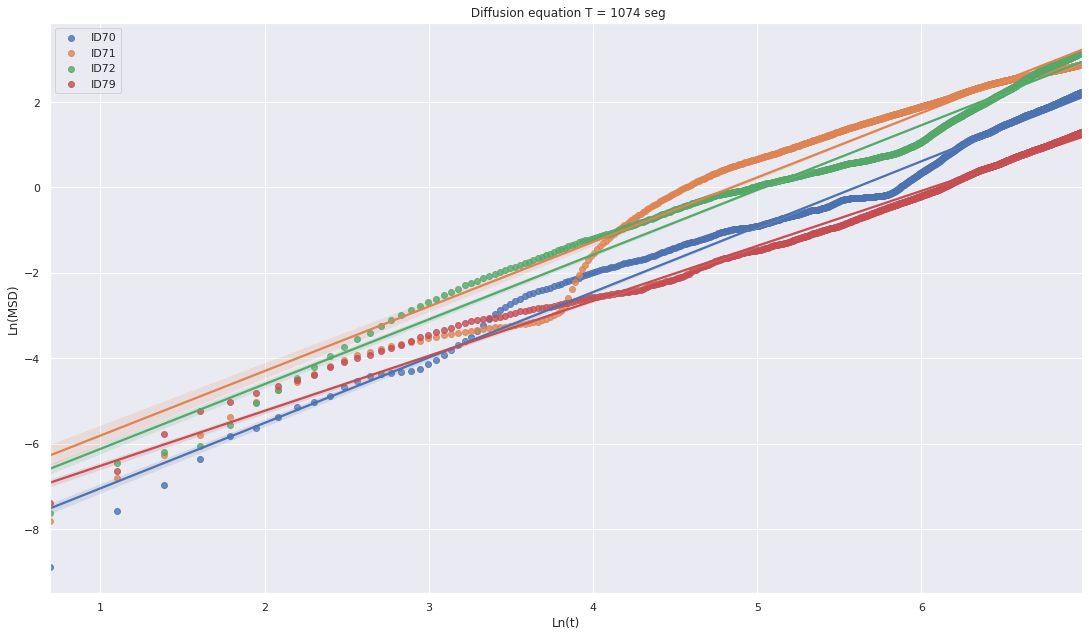

In [0]:
MSD_def(x_A,y_A,z="ID70")
MSD_def(x_B,y_B,z="ID71")
MSD_def(x_C,y_C,z="ID72")
MSD_def(x_D,y_D,z="ID79")